## Exercise 3

In [3]:
# Import relevant libraries

import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter

In [4]:
# load ct image

x = loadmat('ct.mat')

# convert it from dictionary to numpy array
result = x.items()
data = list(result)
im = np.array(data[3][1])

In [5]:
# projection along the x axis results in an image from the coronal plane

# how to compute voxel size? 
# Voxel size is related to both the pixel size and slice thickness. 
# FOV: field of view, gives used the overall measurements of the whole image. 

# Pixel size (x, y): equal to the field of view (x,y) divided by the matrix size. 
# Thickness (z): equal to the field of view (z) divided by the number of slices. 

# get image size

[rows, cols, slices] = im.shape
print(im.shape)



(512, 512, 256)


Voxel Size in each direction

In [6]:

# voxel height 
h = 250/slices #(in mm)

# voxel/pixel x and y dimensions

x_dim = 190/rows #(in mm)
y_dim = 190/cols #(in mm)

# print voxel dimensions 

print('Voxel dimensions (x,y,z) (in mm): ', x_dim, y_dim, h)

Voxel dimensions (x,y,z) (in mm):  0.37109375 0.37109375 0.9765625


Attenuation equation

In [7]:
# data

I0 = 1200 # photons per pixel
miu_h2o = 0.0206 # water attenuation coefficent, mm^-1
dx = x_dim # direction in each we're projecting from
# calculate ct attenuation coefficient

miu_ct = miu_h2o * (1+im/1000) # each voxel (?) has an attenuation coefficient

# attenuation equation 
# a_eq = I0 * np.exp(-sum(miu(x,y,x))*dx)

# rationale: in each pixel we place the sum of the attenuation coefficients (for that pixel in each slice) in a 2D matrix. 
# then we adjust the intesity with the attenuation equation along x.

proj = np.zeros([cols,slices]) # initialize 2D matrix for the projection along the x axis

for i in range(slices): # go by slice
    for j in range(cols):
        for k in range(rows):
            proj[j,i] = proj[j,i] + miu_ct[k,j,i] # proj becomes a 2D matrix with the sum of each slice's attenuation coefficient in each pixel
        proj[j,i] = 2*I0*np.exp(-proj[j,i]*dx) # calculate the new intensity of each pixel by adjusting the initial intensity with exp(-sum(miu(x,y,z))*dx)




In [12]:
# data

I0 = 1200 # photons per pixel
miu_h2o = 0.0206 # water attenuation coefficent, mm^-1
dx = x_dim # direction in each we're projecting from
# calculate ct attenuation coefficient

miu_ct = miu_h2o * (1+im/1000) # each voxel (?) has an attenuation coefficient

# attenuation equation 
# a_eq = I0 * np.exp(-sum(miu(x,y,x))*dx)

# rationale: in each pixel we place the sum of the attenuation coefficients (for that pixel in each slice) in a 2D matrix. 
# then we adjust the intesity with the attenuation equation along x.

y_proj = np.zeros([rows,slices]) # initialize 2D matrix for the projection along the x axis

for i in range(slices): # go by slice
    for j in range(rows):
        for k in range(cols):
            y_proj[j,i] = y_proj[j,i] + miu_ct[j,k,i] # proj becomes a 2D matrix with the sum of each slice's attenuation coefficient in each pixel
        y_proj[j,i] = I0*np.exp(-y_proj[j,i]*dx) # calculate the new intensity of each pixel by adjusting the initial intensity with exp(-sum(miu(x,y,z))*dx)


Display

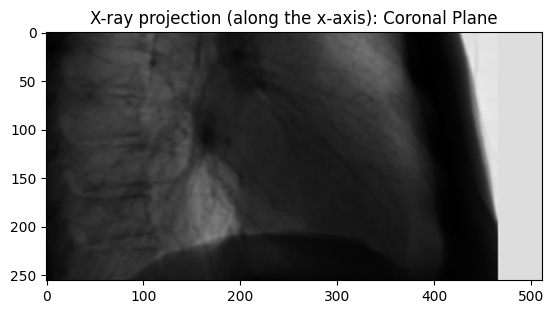

In [14]:
plt.figure("Projection along the y axis")
plt.title("X-ray projection (along the y-axis): Sagittal Plane")
y_xray = np.rot90(y_proj)
plt.imshow(y_xray,cmap='gray')

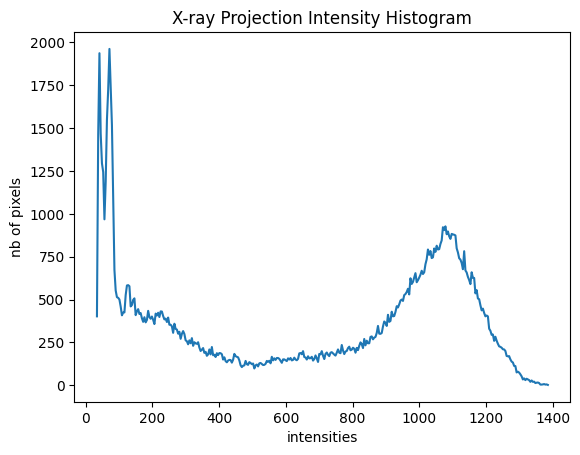

In [11]:
# creating the ct histogram
histogram, bin_edges = np.histogram(proj, bins=362)
# configurating and drawing the histogram figure
plt.figure()
plt.title("X-ray Projection Intensity Histogram")
plt.xlabel("intensities")
plt.ylabel("nb of pixels")
plt.plot(bin_edges[0:-1], histogram)